In [3]:
! pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


Defaulting to user installation because normal site-packages is not writeable


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
import shutil
import urllib
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords

ModuleNotFoundError: No module named 'cv2'

In [2]:
age_model = cv2.dnn.readNetFromCaffe("age.prototxt.txt", "dex_chalearn_iccv2015.caffemodel")
gender_model = cv2.dnn.readNetFromCaffe("gender.prototxt.txt", "gender.caffemodel")
detector_path = "C:\Python39\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml"
detector = cv2.CascadeClassifier(detector_path)

In [3]:
df = pd.read_excel('Sample_data.xlsx')
print(df.head())

   Unnamed: 0                       Date      User Name       User ID  \
0           0  2022-10-23 22:50:00+00:00      MiaDaPup1  8.886060e+17   
1           1  2022-10-23 21:05:35+00:00      MiaDaPup1  8.886060e+17   
2           2  2022-10-23 19:04:07+00:00    MikeB4Three  1.361740e+18   
3           3  2022-10-23 15:09:10+00:00     annsummtbe  5.067381e+08   
4           4  2022-10-23 14:14:42+00:00  HearMeTalkNow  8.268940e+17   

                                               Tweet       Location  \
0  The #studentloanforgiveness plan is to help th...  United States   
1  For those 44+ million voters that applied for ...  United States   
2  Two questions for you @RepMTG. Did you get $18...  United States   
3  if i join #AmazonPrime i have to pay full pric...  United States   
4  @margoleo @VernBuchanan $3,200,000 #GOPHypocri...  United States   

                                           Image URL  
0  https://pbs.twimg.com/profile_images/119121188...  
1  https://pbs.twimg.com

In [4]:
urls = df["Image URL"]


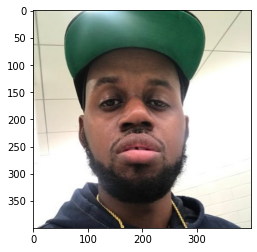

In [5]:
ageList = []
genderList = []
i = 0
for url in urls:
    
    img_url = url
    urllib.request.urlretrieve(url, "local-filename.jpg")
    #img = Image.open(requests.get(img_url, stream = True).raw)
    #img.save('greenland_02a.jpg')
    img = cv2.imread("local-filename.jpg")
    plt.imshow(img[:,:,::-1])
    faces = detector.detectMultiScale(img,1.3,5)
    if(len(faces)==0 or len(faces)> 1):
        #remove the row
        age = -1
        gender = -1
        #print("MORE THAN 1 FACE, ABORT")

    else:
        x, y ,w, h = faces[0]


        #detect faces and reshape
        detected_face = img[int(y):int(y+h), int(x):int(x+w)]
        #plt.imshow(detected_face[:,:,::-1])
        detected_face = cv2.resize(detected_face, (224,224))
        detected_face_blob = cv2.dnn.blobFromImage(detected_face)

        #predict age
        age_model.setInput(detected_face_blob)
        age_result = age_model.forward()
        indexes = np.array([i for i in range(0,101)])
        age = np.sum(age_result[0] * indexes)

        #predict gender
        gender_model.setInput(detected_face_blob)
        gender_class = gender_model.forward()[0]
        gender = 'Woman ' if np.argmax(gender_class) == 0 else 'Man'
    if(age < 18):
        ageList.append("<18")
    elif( 18 <= age <= 23):
        ageList.append("18-24")
    elif( 24<=age<= 30):
        ageList.append("24-30")
    elif( 31<= age <= 50):
        ageList.append("30-50")
    else:
        ageList.append(">50")
    genderList.append(gender)

In [6]:
len(ageList)

100

In [7]:
df["Age"]= ageList
df["Gender"] = genderList
print(df.head())

   Unnamed: 0                       Date      User Name       User ID  \
0           0  2022-10-23 22:50:00+00:00      MiaDaPup1  8.886060e+17   
1           1  2022-10-23 21:05:35+00:00      MiaDaPup1  8.886060e+17   
2           2  2022-10-23 19:04:07+00:00    MikeB4Three  1.361740e+18   
3           3  2022-10-23 15:09:10+00:00     annsummtbe  5.067381e+08   
4           4  2022-10-23 14:14:42+00:00  HearMeTalkNow  8.268940e+17   

                                               Tweet       Location  \
0  The #studentloanforgiveness plan is to help th...  United States   
1  For those 44+ million voters that applied for ...  United States   
2  Two questions for you @RepMTG. Did you get $18...  United States   
3  if i join #AmazonPrime i have to pay full pric...  United States   
4  @margoleo @VernBuchanan $3,200,000 #GOPHypocri...  United States   

                                           Image URL    Age Gender  
0  https://pbs.twimg.com/profile_images/119121188...    <18     -

In [8]:
df_filtered = df[df['Gender'] != -1]
print(df_filtered.head())

    Unnamed: 0                       Date       User Name       User ID  \
3            3  2022-10-23 15:09:10+00:00      annsummtbe  5.067381e+08   
13          13  2022-10-22 18:50:42+00:00   lynettelee201  3.520985e+07   
17          17  2022-10-22 16:06:04+00:00        ChaseRaz  1.434783e+08   
20          20  2022-10-22 11:19:26+00:00  kathleenalice4  1.189370e+18   
31          31  2022-10-21 23:39:23+00:00  SincerelyBlogg  2.526164e+09   

                                                Tweet       Location  \
3   if i join #AmazonPrime i have to pay full pric...  United States   
13  #studentloanforgiveness #biden\nhttps://t.co/I...  United States   
17  Dark Brandon setting MAGA cry babies straight....  United States   
20  Indeed \n#studentloanforgiveness https://t.co/...  United States   
31  Welp! Start saving your money because the cour...  United States   

                                            Image URL    Age  Gender  
3   https://pbs.twimg.com/profile_images/9656

In [10]:
file_name = 'sampleDataAge.xlsx'
df_filtered.to_excel(file_name)

In [12]:
tweets = df_filtered["Tweet"]

In [24]:
tweets = list(tweets)

In [25]:
type(tweets)

list

In [42]:
cleanedTweets = []
for t in tweets:
    #t = tweets[0]
    tokens = []
    tokens=nltk.word_tokenize(t)
    #print(tokens)
    for i in range (0,len(tokens)):
        tokens[i]= tokens[i].lower()
    for i in tokens:
        if (i.isalpha()==False):
            tokens.remove(i)
    for t in tokens:
        if (t in stopwords.words('english')):
            tokens.remove(t)
    wnl = nltk.WordNetLemmatizer()
    for t in tokens:
        tokens[tokens.index(t)]=(wnl.lemmatize(t)) 

    #print(tokens)
    #for t in tweets:
    #    print(tweets.index(t))

    
    cleanedTweets.append(tokens)

In [44]:
len(cleanedTweets)

15

In [45]:
df_filtered["Cleaned tweets"] = cleanedTweets

C:\Users\amaan\AppData\Local\Temp\ipykernel_17156\2460215431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cleaned tweets"] = cleanedTweets


In [46]:
df_filtered

,Unnamed: 0,Date,User Name,User ID,Tweet,Location,Image URL,Age,Gender,Cleaned tweets
3,3,2022-10-23 15:09:10+00:00,annsummtbe,5.067381e+08,if i join #AmazonPrime i have to pay full pric...,United States,https://pbs.twimg.com/profile_images/965659189...,18-24,Man,"[join, amazonprime, i, have, pay, full, price,..."
13,13,2022-10-22 18:50:42+00:00,lynettelee201,3.520985e+07,#studentloanforgiveness #biden\nhttps://t.co/I...,United States,https://pbs.twimg.com/profile_images/152561136...,18-24,Man,"[studentloanforgiveness, biden, http, //t.co/i..."
17,17,2022-10-22 16:06:04+00:00,ChaseRaz,1.434783e+08,Dark Brandon setting MAGA cry babies straight....,United States,https://pbs.twimg.com/profile_images/151348649...,24-30,Man,"[dark, brandon, setting, maga, cry, baby, stra..."
20,20,2022-10-22 11:19:26+00:00,kathleenalice4,1.189370e+18,Indeed \n#studentloanforgiveness https://t.co/...,United States,https://pbs.twimg.com/profile_images/152413498...,30-50,Man,"[indeed, studentloanforgiveness, http, //t.co/..."
31,31,2022-10-21 23:39:23+00:00,SincerelyBlogg,2.526164e+09,Welp! Start saving your money because the cour...,United States,https://pbs.twimg.com/profile_images/157860148...,24-30,Woman,"[welp, start, saving, money, court, temporaril..."
34,34,2022-10-21 15:21:00+00:00,Ann_Francis2022,1.509830e+18,I'm not sure what I'll want to know 4 months l...,United States,https://pbs.twimg.com/profile_images/151035556...,24-30,Woman,"[not, sure, i, want, know, month, later, tryin..."
37,37,2022-10-21 10:03:00+00:00,Ann_Francis2022,1.509830e+18,"Who needs money when you can get anxiety, debt...",United States,https://pbs.twimg.com/profile_images/151035556...,24-30,Woman,"[need, money, you, get, anxiety, debt, eternal..."
43,43,2022-10-20 19:18:30+00:00,dschein1,3.255710e+08,The first legal challenges to #Bidenâ€™s #stud...,United States,https://pbs.twimg.com/profile_images/962023528...,>50,Man,"[first, legal, challenge, bidenâ€™s, studentlo..."
59,59,2022-10-18 12:48:47+00:00,Wethepeople0o,1.427710e+18,@lvhothead2483 @GOP Seriously have you seen wh...,United States,https://pbs.twimg.com/profile_images/146255602...,24-30,Man,"[lvhothead2483, gop, seriously, you, seen, the..."
87,87,2022-10-15 19:50:11+00:00,StardustBluePR,2.063573e+08,#StudentLoanForgiveness \n#StudentLoans \nðŸ‘‡...,United States,https://pbs.twimg.com/profile_images/126511842...,18-24,Woman,"[studentloanforgiveness, studentloans, ðÿ, ‡ðÿ..."


In [47]:
file_name = 'sampleDataAge.xlsx'
df_filtered.to_excel(file_name)